In [5]:
from djexpcode.schemas import *
from djexpcode import *
dd = VisualStimuli().fetch()
%matplotlib notebook

In [2]:
from pandas import read_json
stimdf = read_json( dd['stim_definition'][-1][0])
# Find the stimuli that are visual
if 'puff' in stimdf:
    vstimidx = np.where(~((stimdf['puff'] == 1) & (stimdf['c'] == 0)))[0]
else:
    vstimidx = np.arange(len(stimdf))
# Get the responses
dat = (VisualStimuli.Triggered() 
       & 'session_name = "180209_SK072_2P_JC"' 
       &'session_subname = "run03_bandpass_noise_sf_tuning_whiskers"').fetch()

In [3]:
stim_times = dd['stim_times'][-1]
idx = np.argsort(stim_times[:,0])
sorted_resp = np.stack(dat['stim_df_f'])[:,idx,:]
ii = np.where(np.hstack([1,np.diff(np.sort(stim_times[:,0])),1])>0)[0]
stims = []
for s,e in zip(ii[:-1],ii[1:]):
    stims.append(sorted_resp[:,s:e,:])
stim_dt = dat['stim_dt'][0]
wpre = dat['stim_wpre'][0]
wpost = dat['stim_wpost'][0]
resp_amps = []
bs = []
rs = []
for s in vstimidx:
    resp_amp,b,r = computeMeanResponse(stims[s],
                                        np.linspace(-1*wpre*stim_dt,
                                                    wpost*stim_dt,
                                                    stims[s].shape[2]),
                                        stimduration = np.max(dd['stim_duration'][0]),
                                        offset = 0.1, 
                                        baselinetime = -0.5,
                                        fullOutput = 1)
    resp_amps.append(resp_amp)
    bs.append(b)
    rs.append(r)

<IPython.core.display.Javascript object>


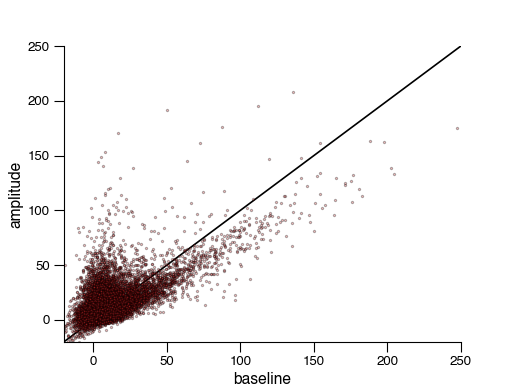

Text(0.5, 0, 'baseline')

In [6]:

# Plot baseline and response.    
plt.figure()
plt.plot([-20,250],[-20,250],color = colors[0])

plt.plot(b,r,'.',markerfacecolor = colors[1],markeredgecolor = 'k',alpha = 0.3)
plt.axis([-20,250,-20,250])
plt.ylabel('amplitude')
plt.xlabel('baseline')

<IPython.core.display.Javascript object>


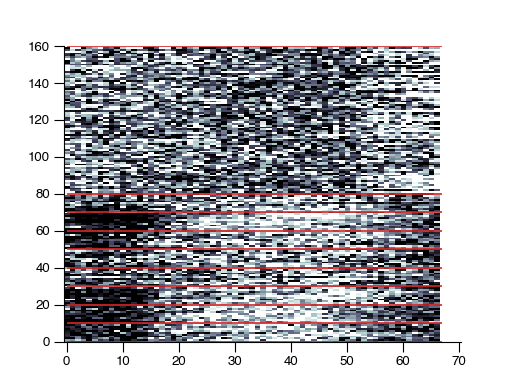

interactive(children=(IntSlider(value=938, description='x', max=1877), Output()), _dom_classes=('widget-intera…

<function __main__.f(x)>

In [7]:
# Iterate over plots...
plt.figure()
d = sorted_resp#stims[-1]#sorted_resp
im = plt.imshow(d[0],clim = [-1,1],cmap = 'bone',aspect = 'auto')
plt.hlines(ii,0,d.shape[2],color = colors[1])
plt.ylim([0,len(d[0])])
def f(x):
    im.set_data(zscore(d[x],axis = 1)) # carefull, zscoring

from ipywidgets import interact
interact(f,x=(0,len(dat)-1))

<IPython.core.display.Javascript object>


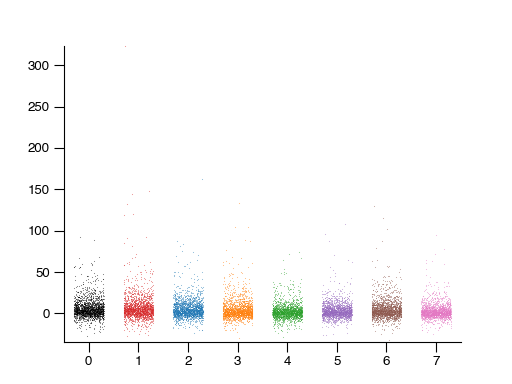

[[<matplotlib.lines.Line2D at 0x7f05211a70b8>],

In [8]:
plt.figure()
plotScatterMultipleVariables(resp_amps)

In [9]:
from scipy.stats import f_oneway

f_oneway(resp_amps)

/opt/conda/envs/tacnav/lib/python3.6/site-packages/scipy/stats/stats.py:2959: RuntimeWarning: invalid value encountered in true_divide
  msb = ssbn / dfbn


F_onewayResult(statistic=array([nan, nan, nan, ..., nan, nan, nan]), pvalue=array([nan, nan, nan, ..., nan, nan, nan]))